In [40]:
from cartopy.crs import EqualEarth, Geodetic
import huracanpy
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [37]:
tracks = huracanpy.load("../TC_tracks/extra/um_glm_n1280_GAL9_Stella.csv", skipinitialspace=True)
tracks

<xarray.Dataset> Size: 224kB
Dimensions:   (record: 3507)
Dimensions without coordinates: record
Data variables:
    track_id  (record) int64 28kB 0 0 0 0 0 0 0 ... 135 135 135 135 135 135 135
    i         (record) int64 28kB 210 211 211 218 220 ... 294 295 295 295 296
    j         (record) int64 28kB 541 541 533 532 533 ... 535 535 536 538 539
    lon       (record) float64 28kB 42.02 42.22 42.22 ... 59.03 59.03 59.23
    lat       (record) float64 28kB -18.32 -18.32 -16.72 ... -17.72 -17.92
    slp       (record) float64 28kB 1.002e+05 9.997e+04 ... 1.004e+05 1.002e+05
    wind      (record) float64 28kB 14.5 14.5 17.17 17.15 ... 13.94 10.65 10.49
    time      (record) datetime64[ns] 28kB 2020-01-21T06:00:00 ... 2021-03-01

(<Figure size 1440x1440 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

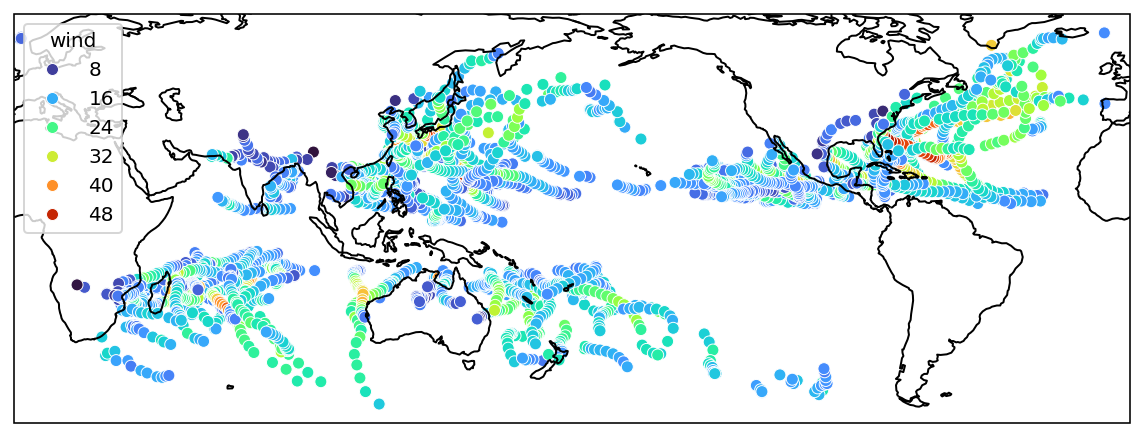

In [38]:
tracks.hrcn.plot_tracks(intensity_var_name = "wind",)

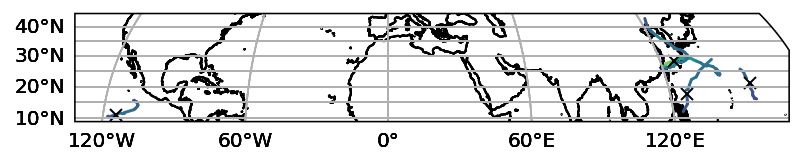

In [42]:
# Plot individual tracks with NaNs
track_ids = np.unique(tracks.track_id[np.isnan(tracks.wind)])
tracks_with_nans = tracks.hrcn.sel_id(track_ids)

ax = plt.axes(projection=EqualEarth())
for track_id, track in tracks_with_nans.groupby("track_id"):
    im = huracanpy.plot.fancyline(track.lon, track.lat, track.wind, vmin=0, vmax=50)
    nan_points = track.isel(record=np.where(np.isnan(track.wind))[0])
    plt.plot(nan_points.lon, nan_points.lat, "kx", transform=Geodetic())

ax.set_extent([-180, 180, -90, 90])
ax.coastlines()
    ax.gridlines(draw_labels=["left", "bottom"])
    